In [6]:
import os, yaml, sys
import numpy as np
import matplotlib.pyplot as plt
import warnings
ENV = os.getenv("MY_ENV", "dev")
with open("../../config.yaml", "r") as f:
    config = yaml.safe_load(f)
paths = config[ENV]["paths"]
sys.path.append(paths["src_path"])
from general_utils.utils import get_lagplot, compute_dRSA, multivariate_ou
from general_utils.regression import lagged_linear_regression

In [14]:
tot_x = []
for i in range(30):
    x = multivariate_ou(T=10.0, dim=20, dt=0.1, corr_length=0.5, random_state=42)
    tot_x.append(x.T)
neural_data = np.stack(tot_x, axis=-1)
model_data = np.stack(tot_x, axis=-1)
# inserts a datapoint at the beginning of the time-series and so the model is lagging behind the neural data (prediction)
zeros = np.random.randn(model_data.shape[0], 1, model_data.shape[2]) 
model_data = np.concatenate((zeros, model_data), axis=1)[:,:-1, :]
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    lr_list = lagged_linear_regression(model_data, neural_data, regression_type='lr', cv_type='kf', n_splits=5, alpha=1.0, max_lag=10)


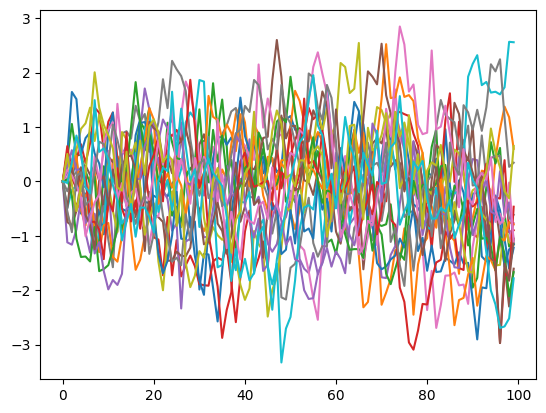

In [15]:
plt.plot(neural_data[:,:,1].T);

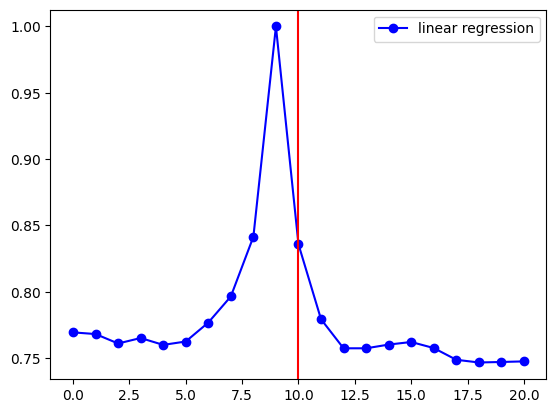

In [22]:
plt.plot(np.array(lr_list), marker="o", color="b")
plt.legend(["linear regression"])
plt.axvline(10, color="r")